# Group 5
# Your Uni : yd2798; jy3482; zz3256 (Also change Uni in the title of your notebook)
# Your Full name : Yixuan Ding; Jingyi Yan; Zihui Zhuang.
# Link to your Public Github repository with Final report  : https://github.com/Zihui-Z/ADV_ML_Project_1


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [252]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# Convert y_test to numerical labels
y_test_labels = y_test.astype('category').cat.codes

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [254]:
## Your answer:

# The y_train.astype('category').cat.codes line transfers the categorical variable to numerical variable.

# The y_train (happiness category) have 5 levels: 'Very Low', 'Low','Average', 'High', 'Very High'.
# The code assigns the unique number for each categories. For example, 'Very Low' is 0 and 'Very High' is 4.

# y_train is the original categorical variable and y_train_labels is the converted numerical variable.

# This step is necessary because usually numeric inputs performs better in machine learning models than string labels.
# This will enable the machine learning can understand the happiness categories while also maintain the ordinal relationship.

<h3> Add new data

In [256]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [257]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

common_countries = set(whr_df['country']).intersection(set(countrydata['country_name']))
print(f"The number of common countries: {len(common_countries)}")

# Since we want to maintain all training and test data, we'll use a 'left' merge.
X_train = X_train.merge(countrydata, left_on="country", right_on="country_name", how="left").drop(columns=["country_name"])
X_test = X_test.merge(countrydata, left_on="country", right_on="country_name", how="left").drop(columns=["country_name"])

The number of common countries: 128


In [258]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [260]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [262]:
## Your answer:

# The output above shows all the data types of all columns in the X_train DataFrame after merging.

# There are 2 categorical columns: 'country' and 'region',
# and 13 numerical variables, including indicators across economics, social well-being, demographic, education, and health area.

Find out the number and percentage of missing values in the table per column

In [264]:
## Your code here:

missing_values = X_train.isnull().sum()
missing_percentage = (missing_values / len(X_train)) * 100

missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage of Missing (%)": missing_percentage})
print(missing_df)

                               Missing Values  Percentage of Missing (%)
country                                     0                   0.000000
region                                      0                   0.000000
gdp_per_capita                              0                   0.000000
social_support                              0                   0.000000
healthy_life_expectancy                     0                   0.000000
freedom_to_make_life_choices                0                   0.000000
generosity                                  0                   0.000000
perceptions_of_corruption                   0                   0.000000
population                                  6                   6.315789
population_below_poverty_line              16                  16.842105
hdi                                         6                   6.315789
life_expectancy                             7                   7.368421
expected_years_of_schooling                 7      

Plot the frequency distribution / histogram of some of the numerical features that you think are important

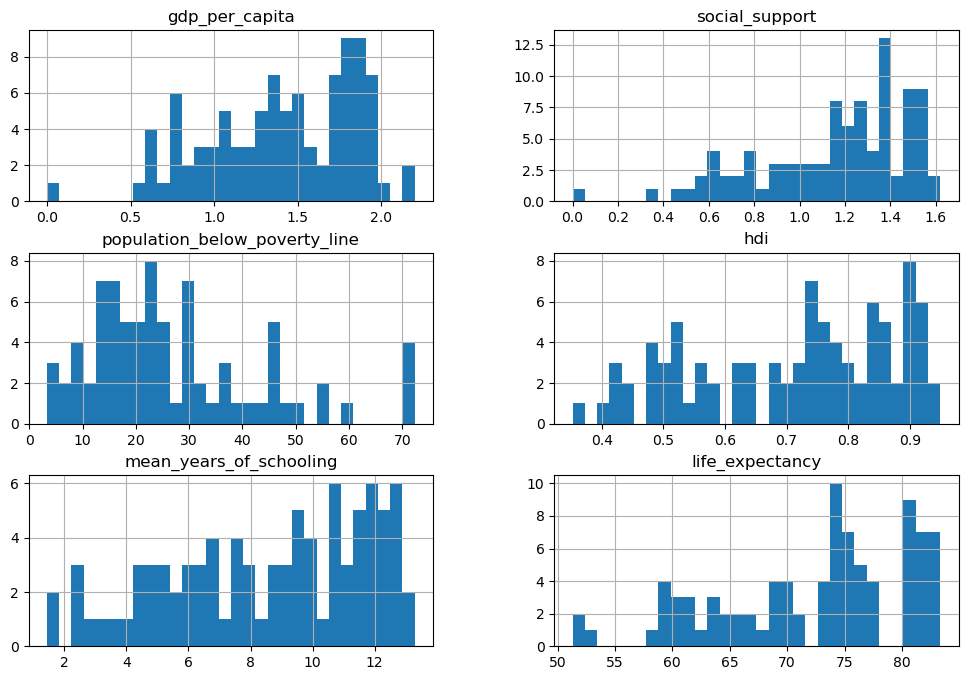

In [266]:
## Your plotting code here:

import matplotlib.pyplot as plt
import seaborn as sns

# I will select one variable from each of the 5 aspects mentioned above: economics, social well-being, demographics, education, and health.
important_var = ["gdp_per_capita", "social_support", "population_below_poverty_line", "hdi", "mean_years_of_schooling", "life_expectancy"]

X_train[important_var].hist(figsize=(12, 8), bins=30)
plt.show()

Plot the categorical variables and their distribution

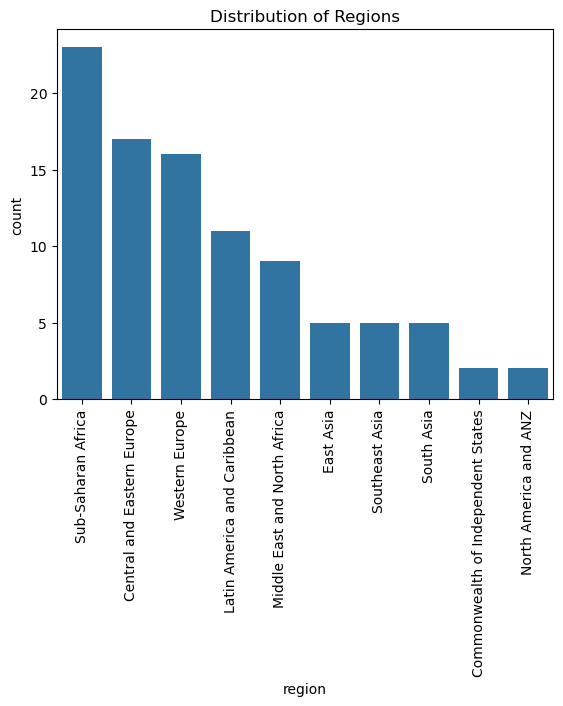

In [268]:
## Your plotting code here:

# Plot by regions
sns.countplot(data=X_train, x="region", order=X_train["region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Regions")
plt.show()

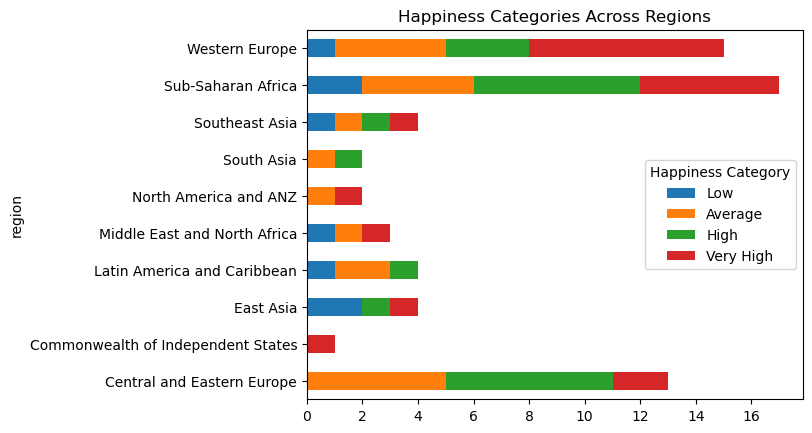

In [269]:
# Plot by happiness categories acorss regions

region_happiness = pd.crosstab(X_train['region'], y_train)
region_happiness.plot(kind='barh',stacked=True)
plt.title('Happiness Categories Across Regions')
plt.legend(title='Happiness Category')
plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

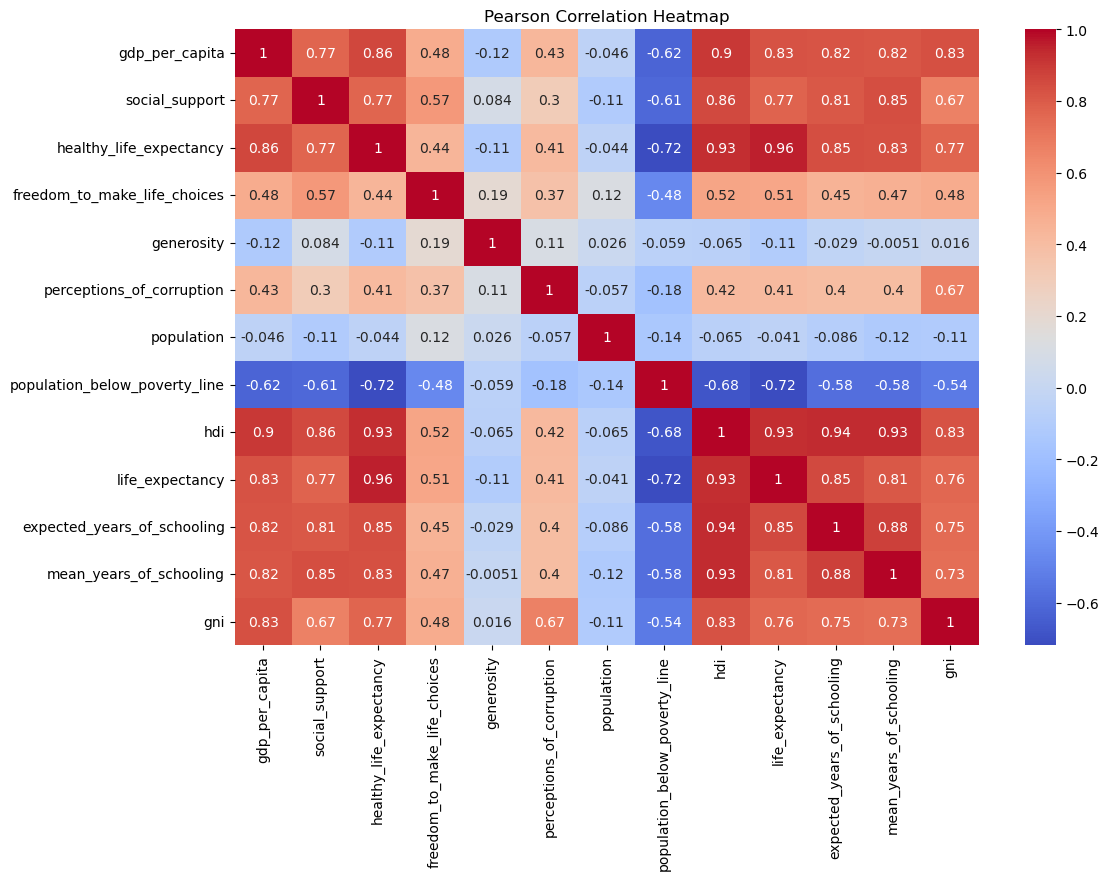

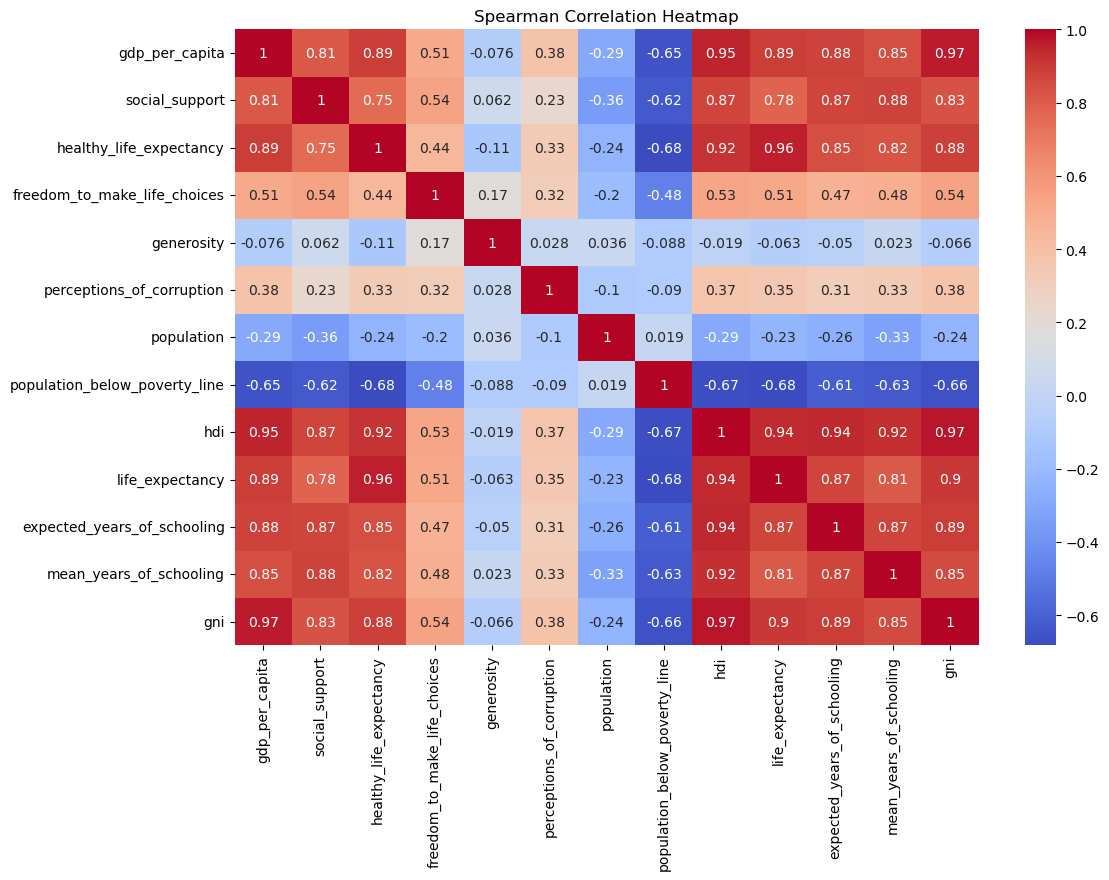

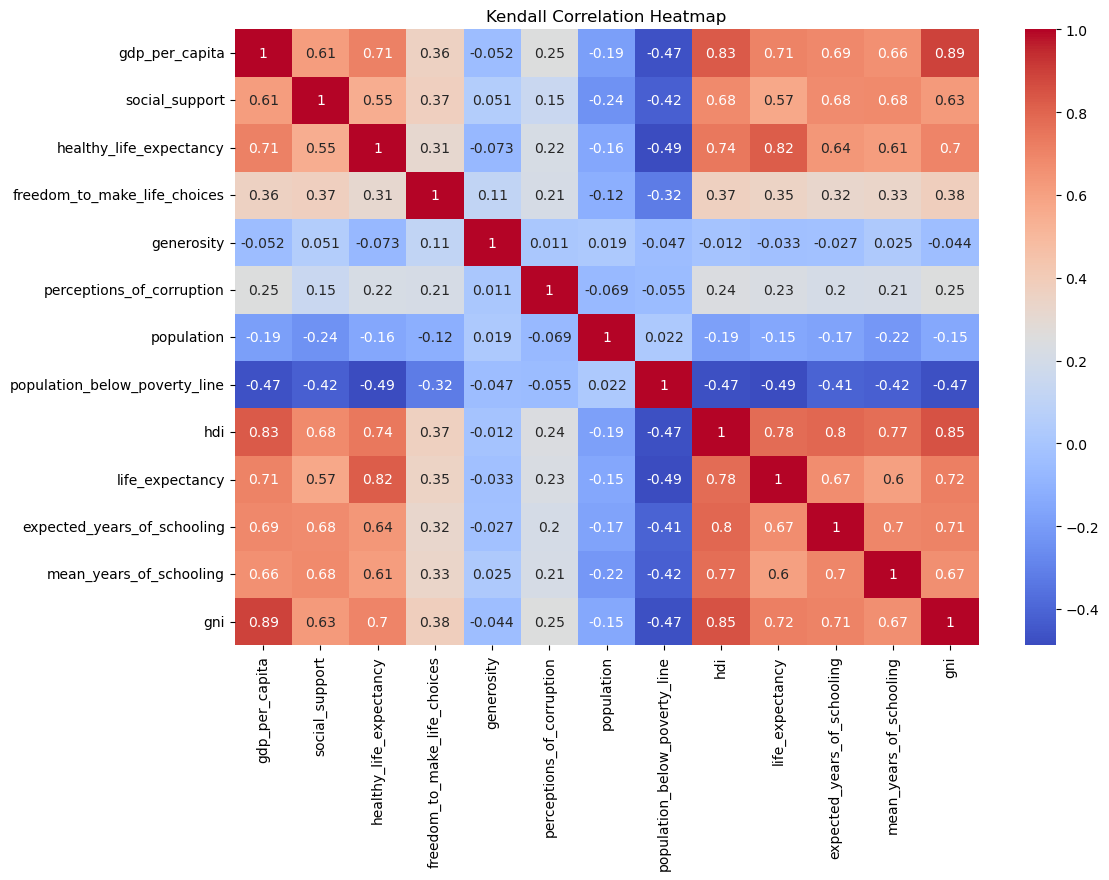

In [271]:
## Your code here:

numerical = X_train.select_dtypes(include=['float64', 'int64']).columns

pearson_corr = X_train[numerical].corr(method='pearson')
spearman_corr = X_train[numerical].corr(method='spearman')
kendall_corr = X_train[numerical].corr(method='kendall')

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True)
plt.title('Spearman Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr, cmap='coolwarm', annot=True)
plt.title('Kendall Correlation Heatmap')
plt.show()


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

Correlation Table Between Variables and Happiness Category
population_below_poverty_line    0.127085
expected_years_of_schooling      0.074950
perceptions_of_corruption        0.058748
social_support                   0.048397
generosity                       0.025733
hdi                              0.020882
healthy_life_expectancy          0.018047
freedom_to_make_life_choices     0.009483
life_expectancy                 -0.013312
gdp_per_capita                  -0.013474
mean_years_of_schooling         -0.026189
gni                             -0.029662
population                      -0.232541
dtype: float64


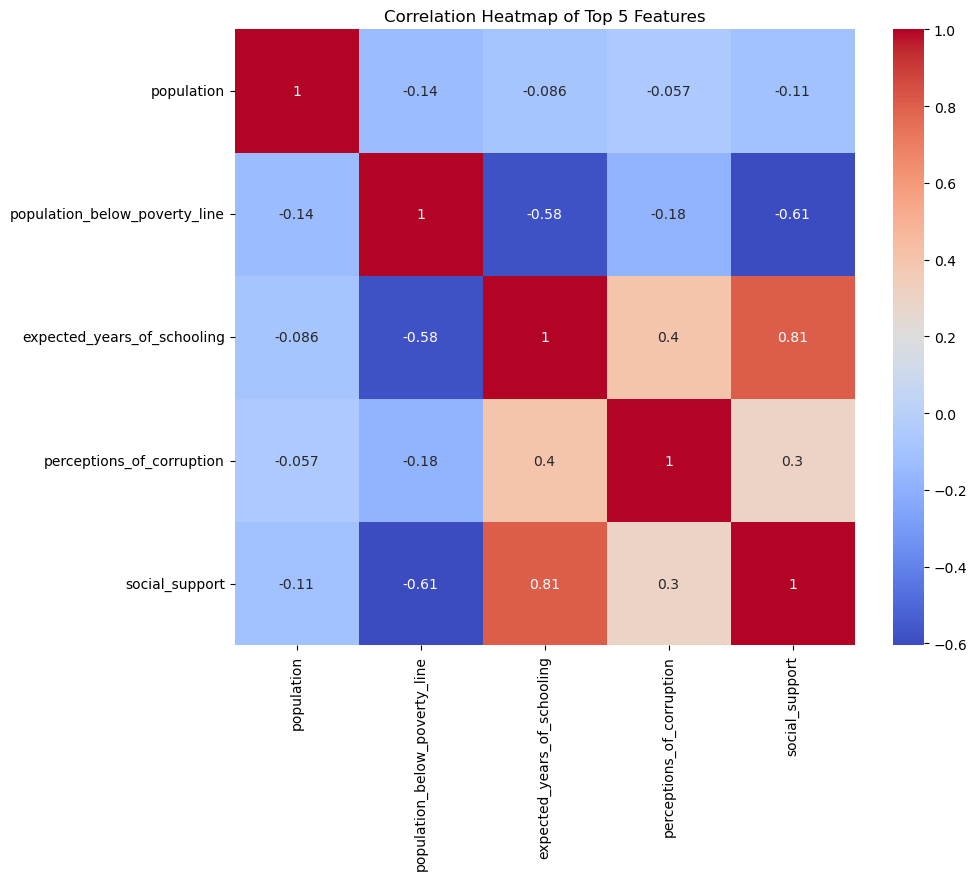

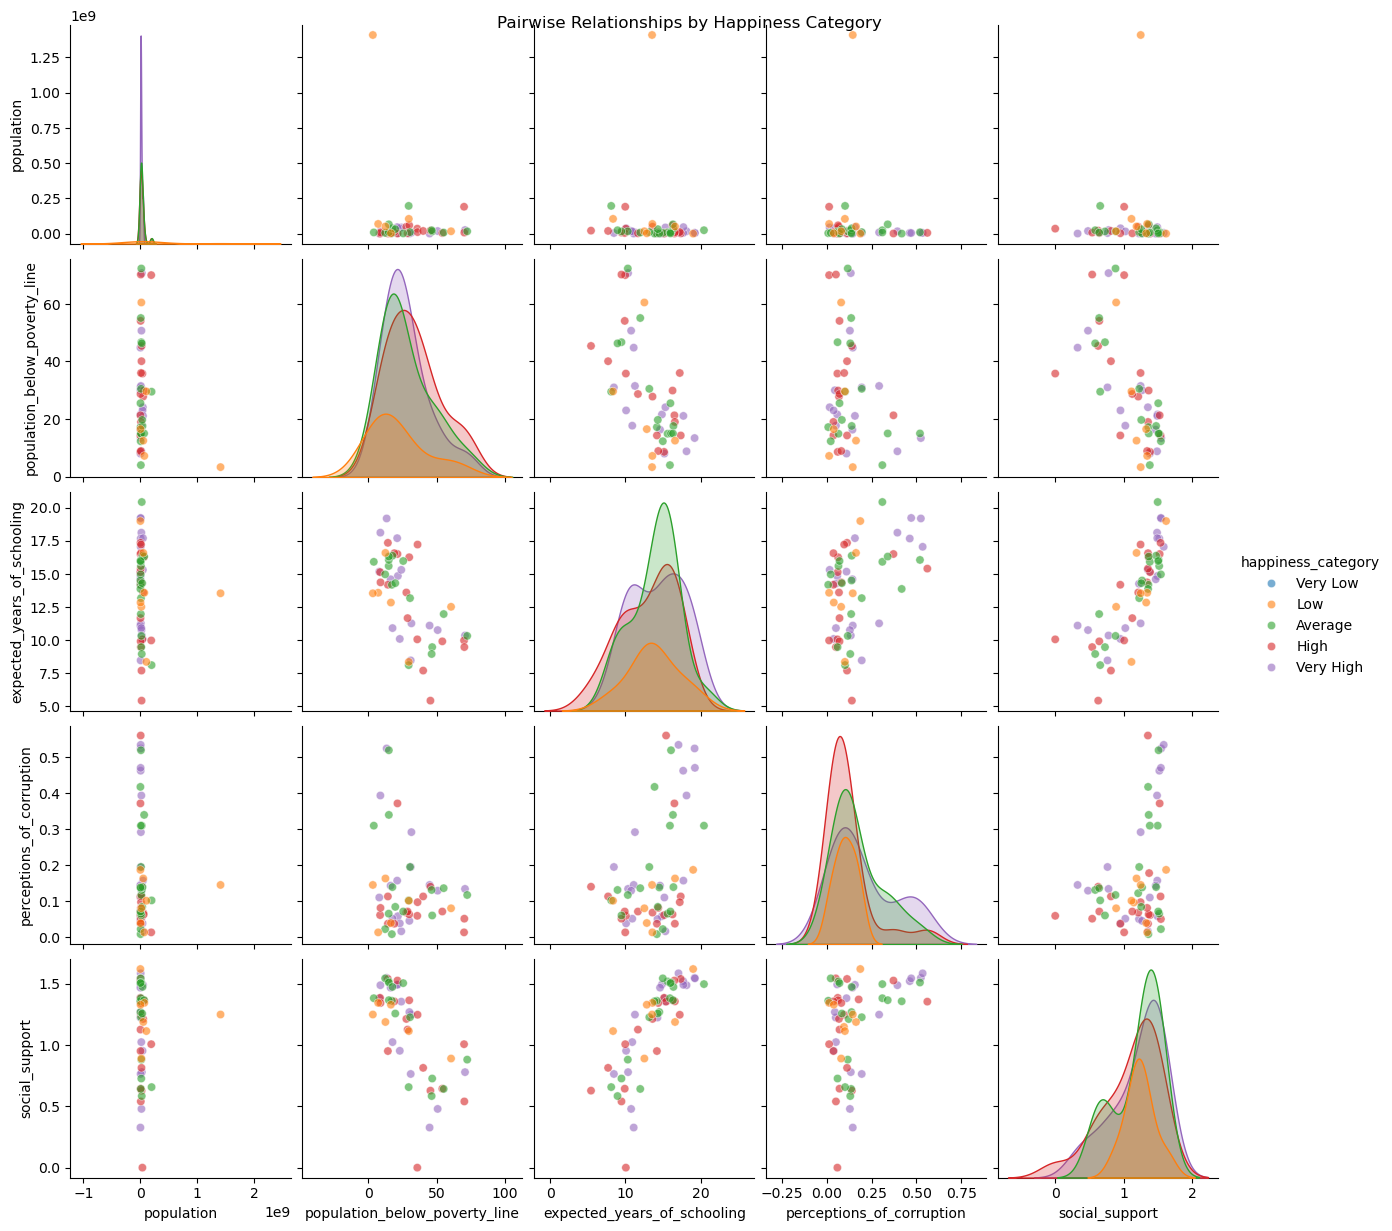

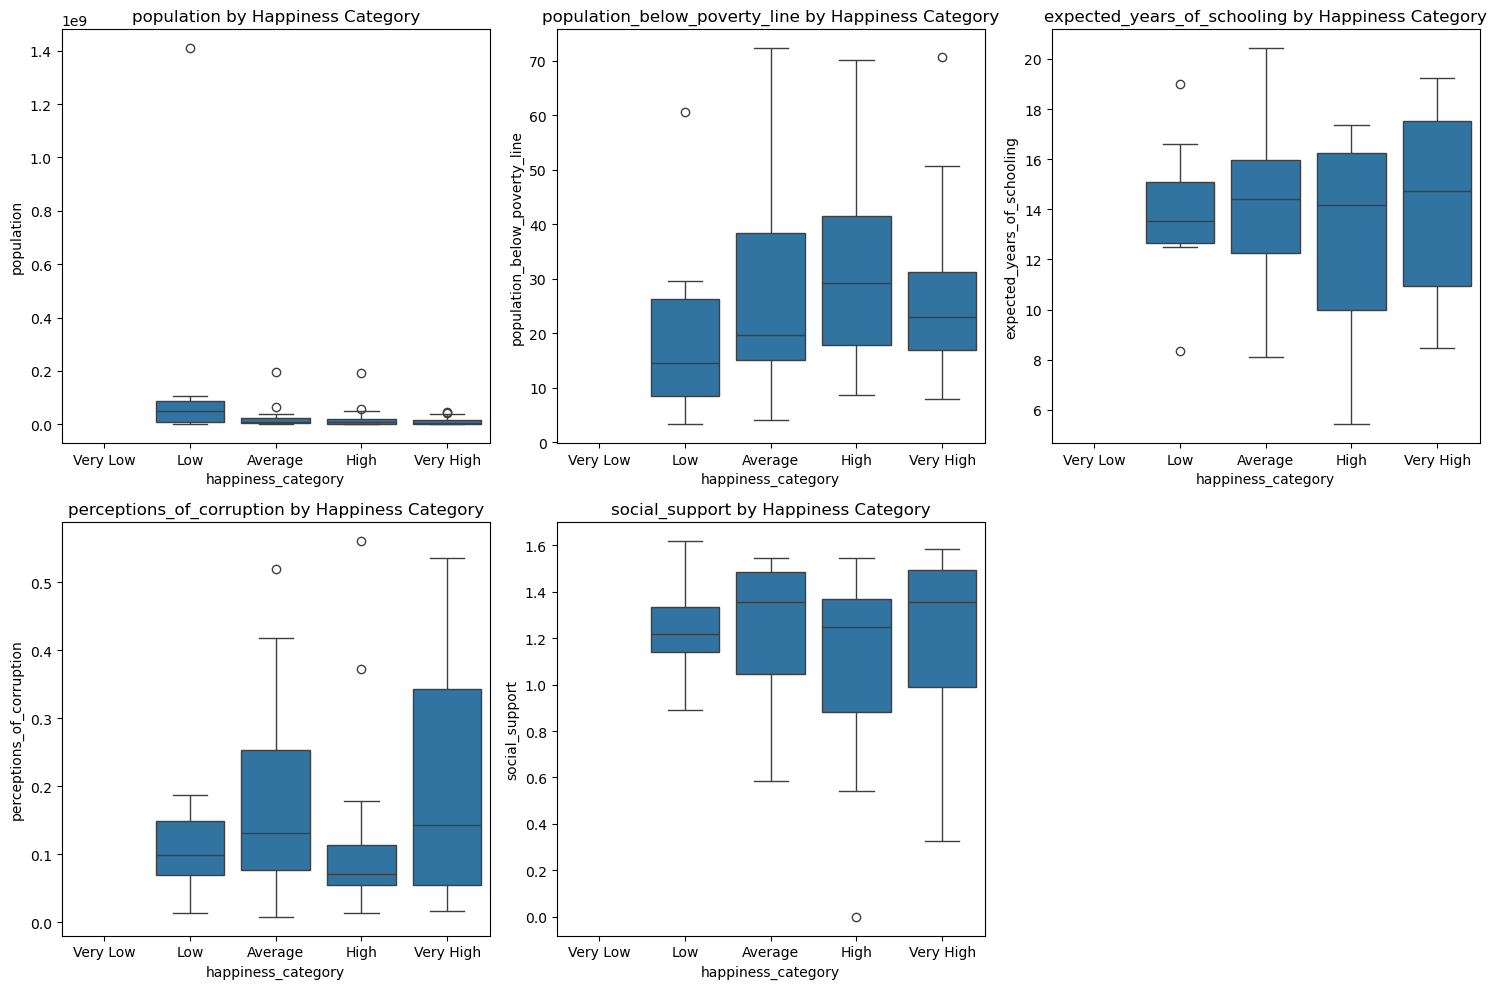

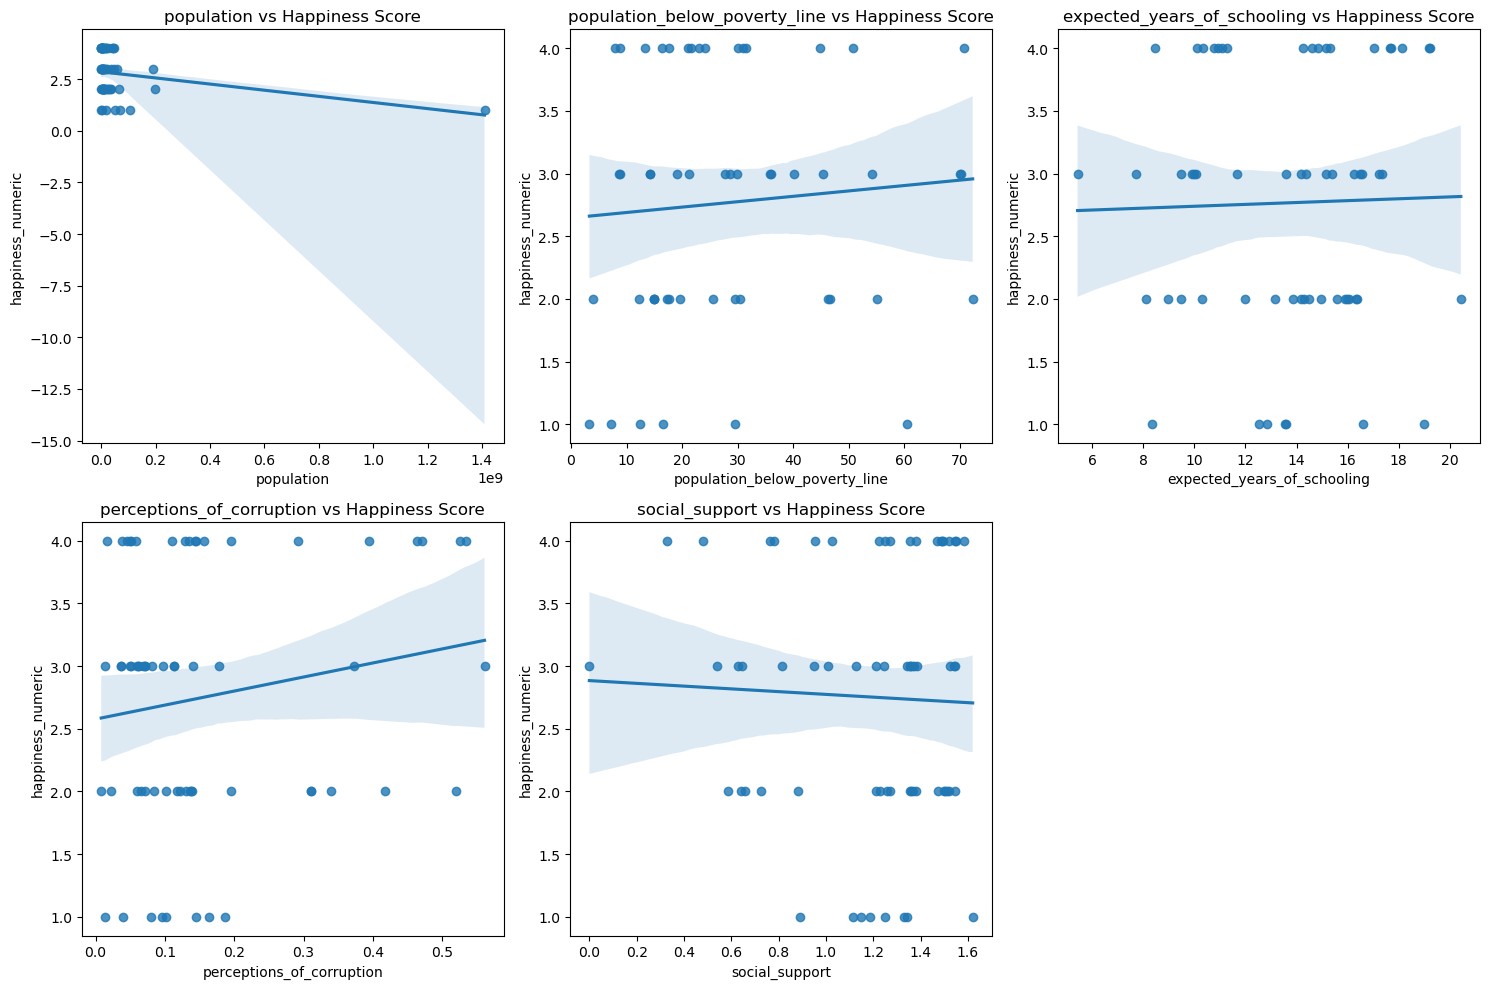

In [273]:
## Your plotting code(s) here:

target_corrs = X_train[numerical].corrwith(y_train_labels, method='spearman').sort_values(ascending=False)

print("Correlation Table Between Variables and Happiness Category")
print(target_corrs)

abs_corrs = target_corrs.abs().sort_values(ascending=False)
top_features = list(abs_corrs.head(5).index)

plot_df = X_train[top_features].copy()
plot_df['happiness_category'] = y_train
plot_df['happiness_numeric'] = y_train_labels

# Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = plot_df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 5 Features')
plt.show()

#Pairplot
sns.pairplot(plot_df, hue='happiness_category', vars=top_features, plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairwise Relationships by Happiness Category')
plt.show()

#Boxplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='happiness_category', y=feature, data=plot_df)
    plt.title(f'{feature} by Happiness Category')
plt.tight_layout()
plt.show()

#Regression Plot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=feature, y='happiness_numeric', data=plot_df)
    plt.title(f'{feature} vs Happiness Score')
plt.tight_layout()
plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

Outliers with Z-score method: 5
gdp_per_capita                   1
social_support                   1
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
healthy_life_expectancy          0
population                       0
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
dtype: int64

Outliers with IQR method:32
perceptions_of_corruption        10
population                        9
population_below_poverty_line     4
freedom_to_make_life_choices      3
social_support                    2
gni                               2
gdp_per_capita                    1
generosity                        1
healthy_life_expectancy           0
hdi                               0
life_expectancy                   0
expected_years_of_schooling       0
mean_years_of_schooling           0
dty

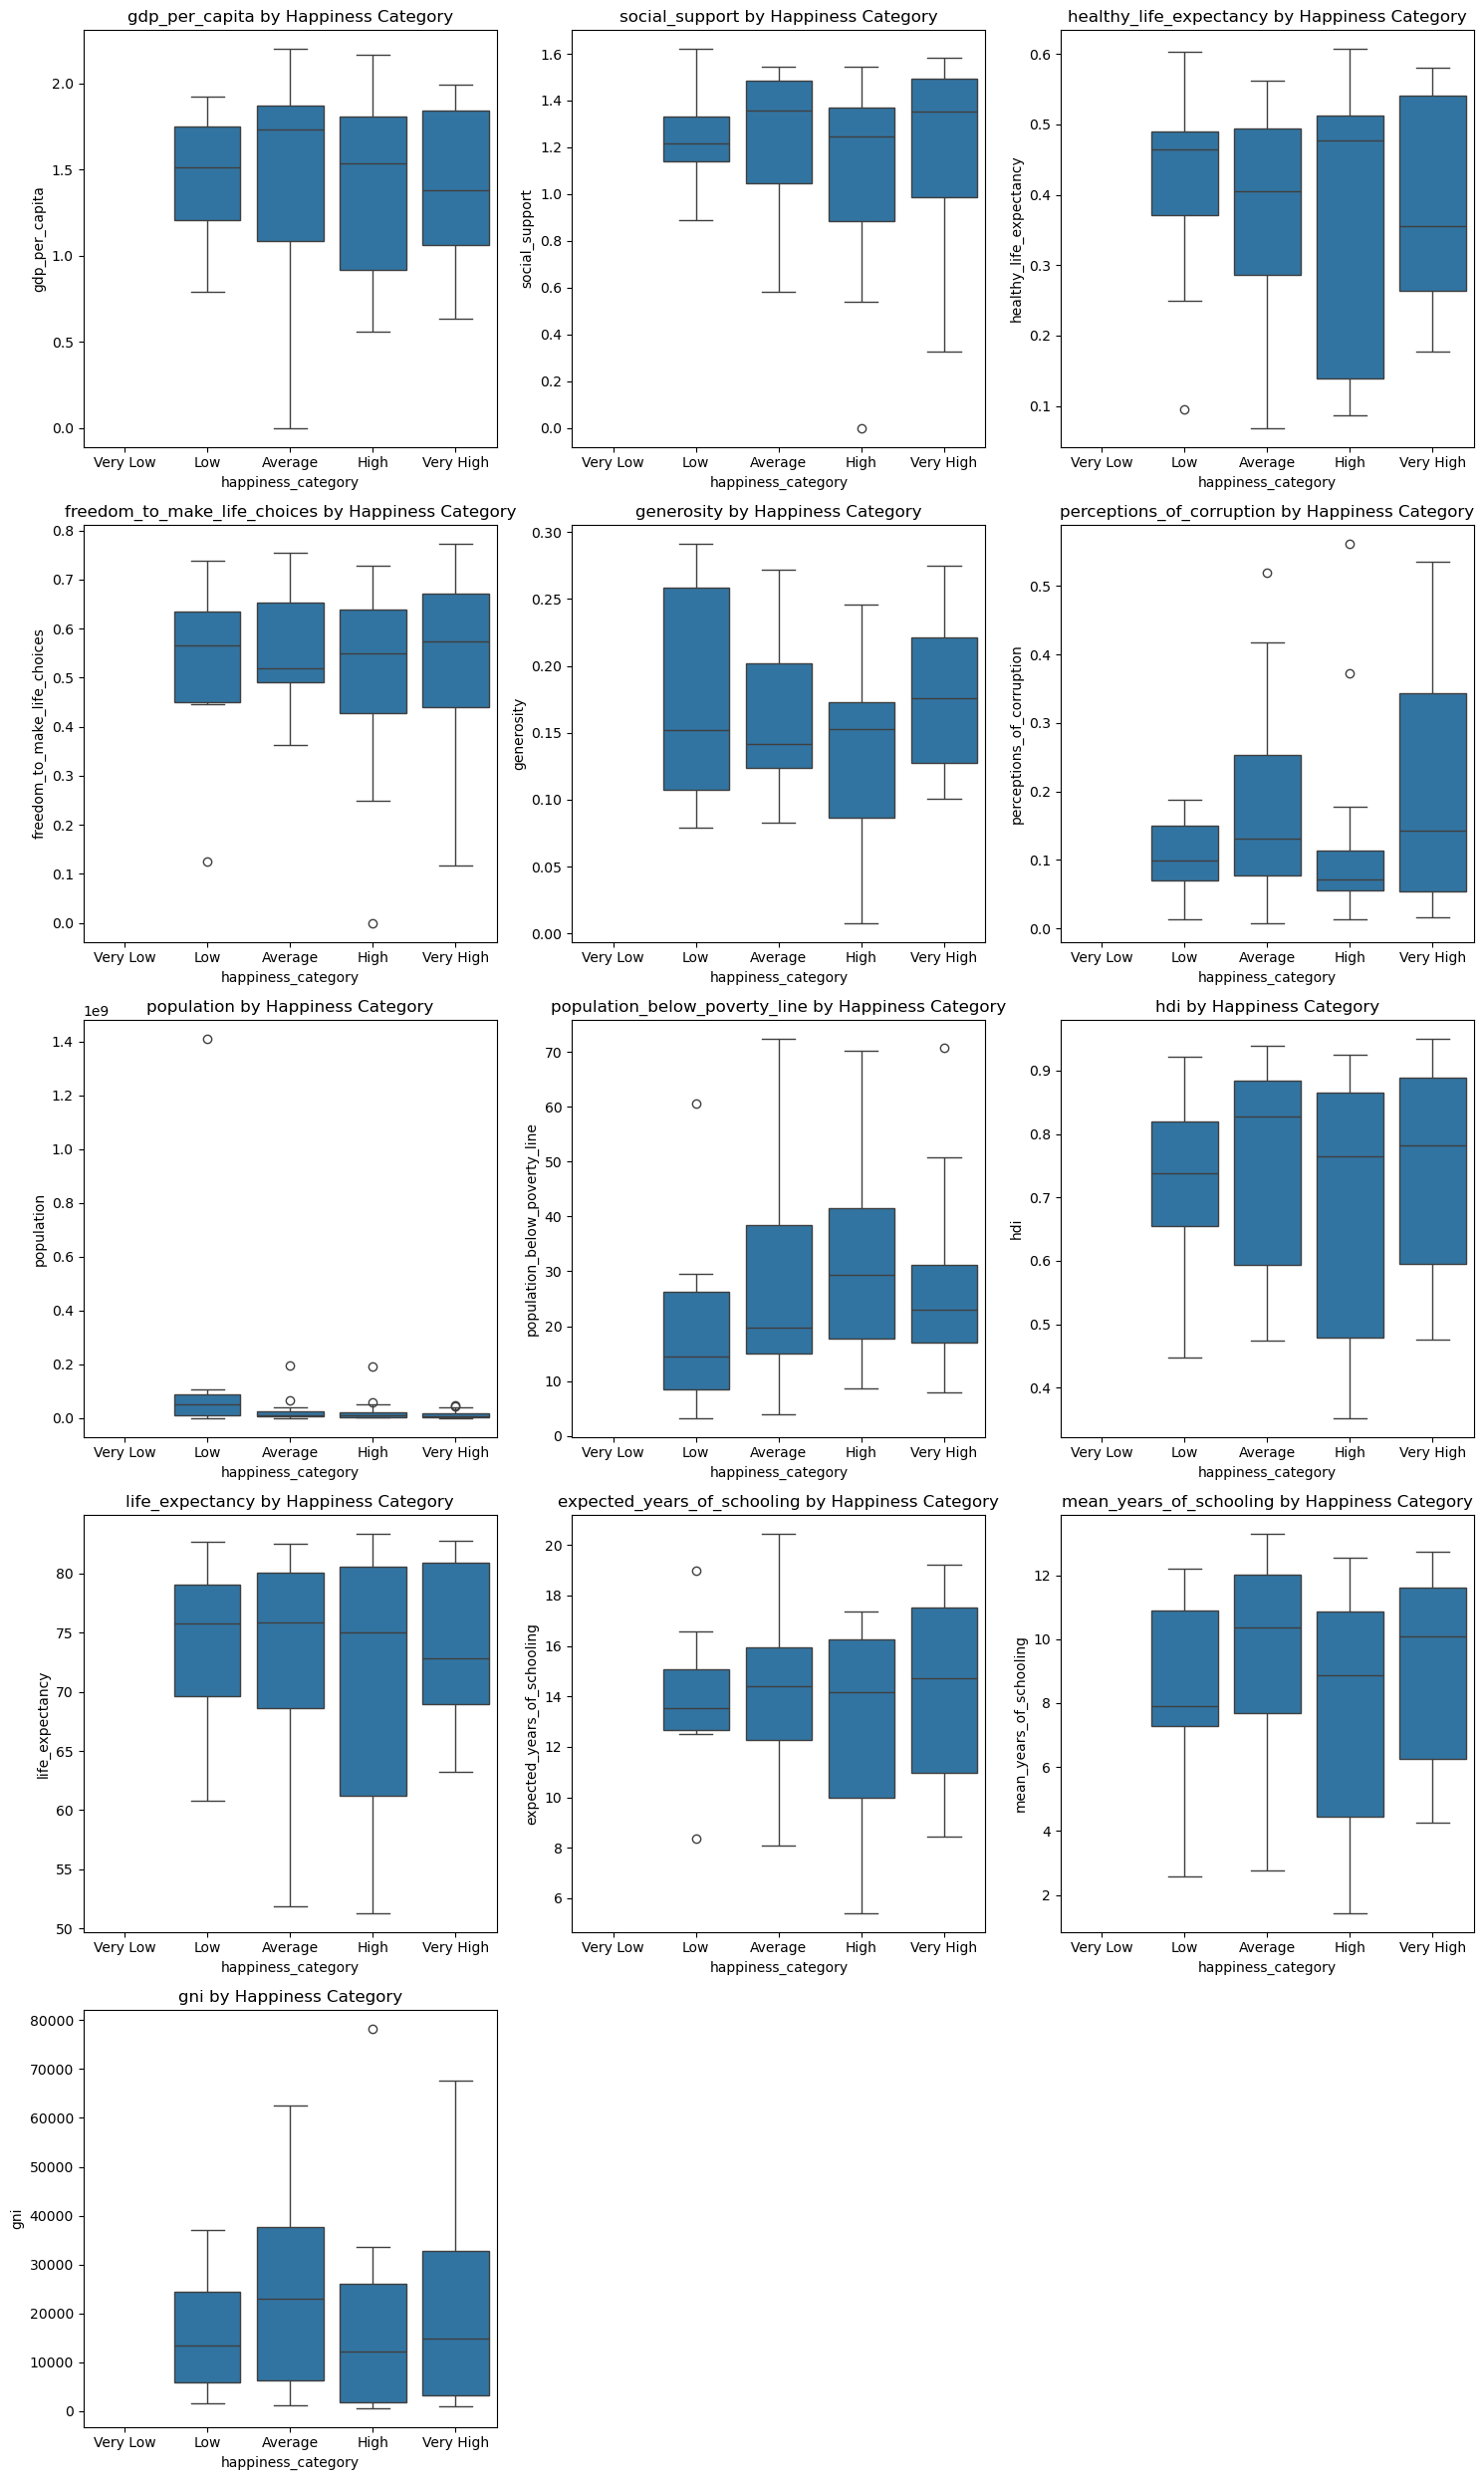

In [275]:
## Your code here:

from scipy.stats import zscore

# For outliers in data:
# Z-Score:

z_scores = X_train[numerical].apply(zscore)

outliers_z = (z_scores.abs() > 3)

print(f"Outliers with Z-score method: {outliers_z.sum().sort_values(ascending=False).sum()}")
print(outliers_z.sum().sort_values(ascending=False))


# IQR:
Q1 = X_train[numerical].quantile(0.25)
Q3 = X_train[numerical].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (X_train[numerical] < lower_bound) | (X_train[numerical] > upper_bound)

print(f"\nOutliers with IQR method:{outliers_iqr.sum().sort_values(ascending=False).sum()}")
print(outliers_iqr.sum().sort_values(ascending=False))

# For outliers in variables across happiness categories
# Boxplot

print("\nThe outliers in variables across happiness categories are shown in the plots below:")

plot_df2 = X_train[numerical].copy()
plot_df2['happiness_category'] = y_train


all_features = X_train[numerical].columns.tolist()

rows, cols = 5, 3
plt.figure(figsize=(15, rows * 5))

for i, feature in enumerate(all_features):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='happiness_category', y=feature, data=plot_df2)
    plt.title(f'{feature} by Happiness Category')
plt.tight_layout()
plt.show()


Write what you observed and your General comments on what should be done:

In [277]:
## Your comments here:

# Only 5 outliers in total are identified by the z-score method.
  # "gdp_per_capita": 1; "social_support": 1; "freedom_to_make_life_choices": 1; "generosity": 1; "perceptions_of_corruption": 1
  # This shows the dataset is well-distributed.

# 32 outliers in total are identified by the IQR method.
 # The outliers are super high in "perceptions_of_corruption" and "population", which have 10 and 9 outoiers.
 # The difference of outliers with different methods shows the dataset has more mild outliers instead of extreme ones.

# From the box plots we can see variables like "population", "gni", and "population_below_poverty_line" exhibit extreme values across different happiness categories.

# We should apply logarithmic transformations to variables have extreme values like "population" and "gni".

# For extremely high outliers, maybe we can use robust scaling techniques.


## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

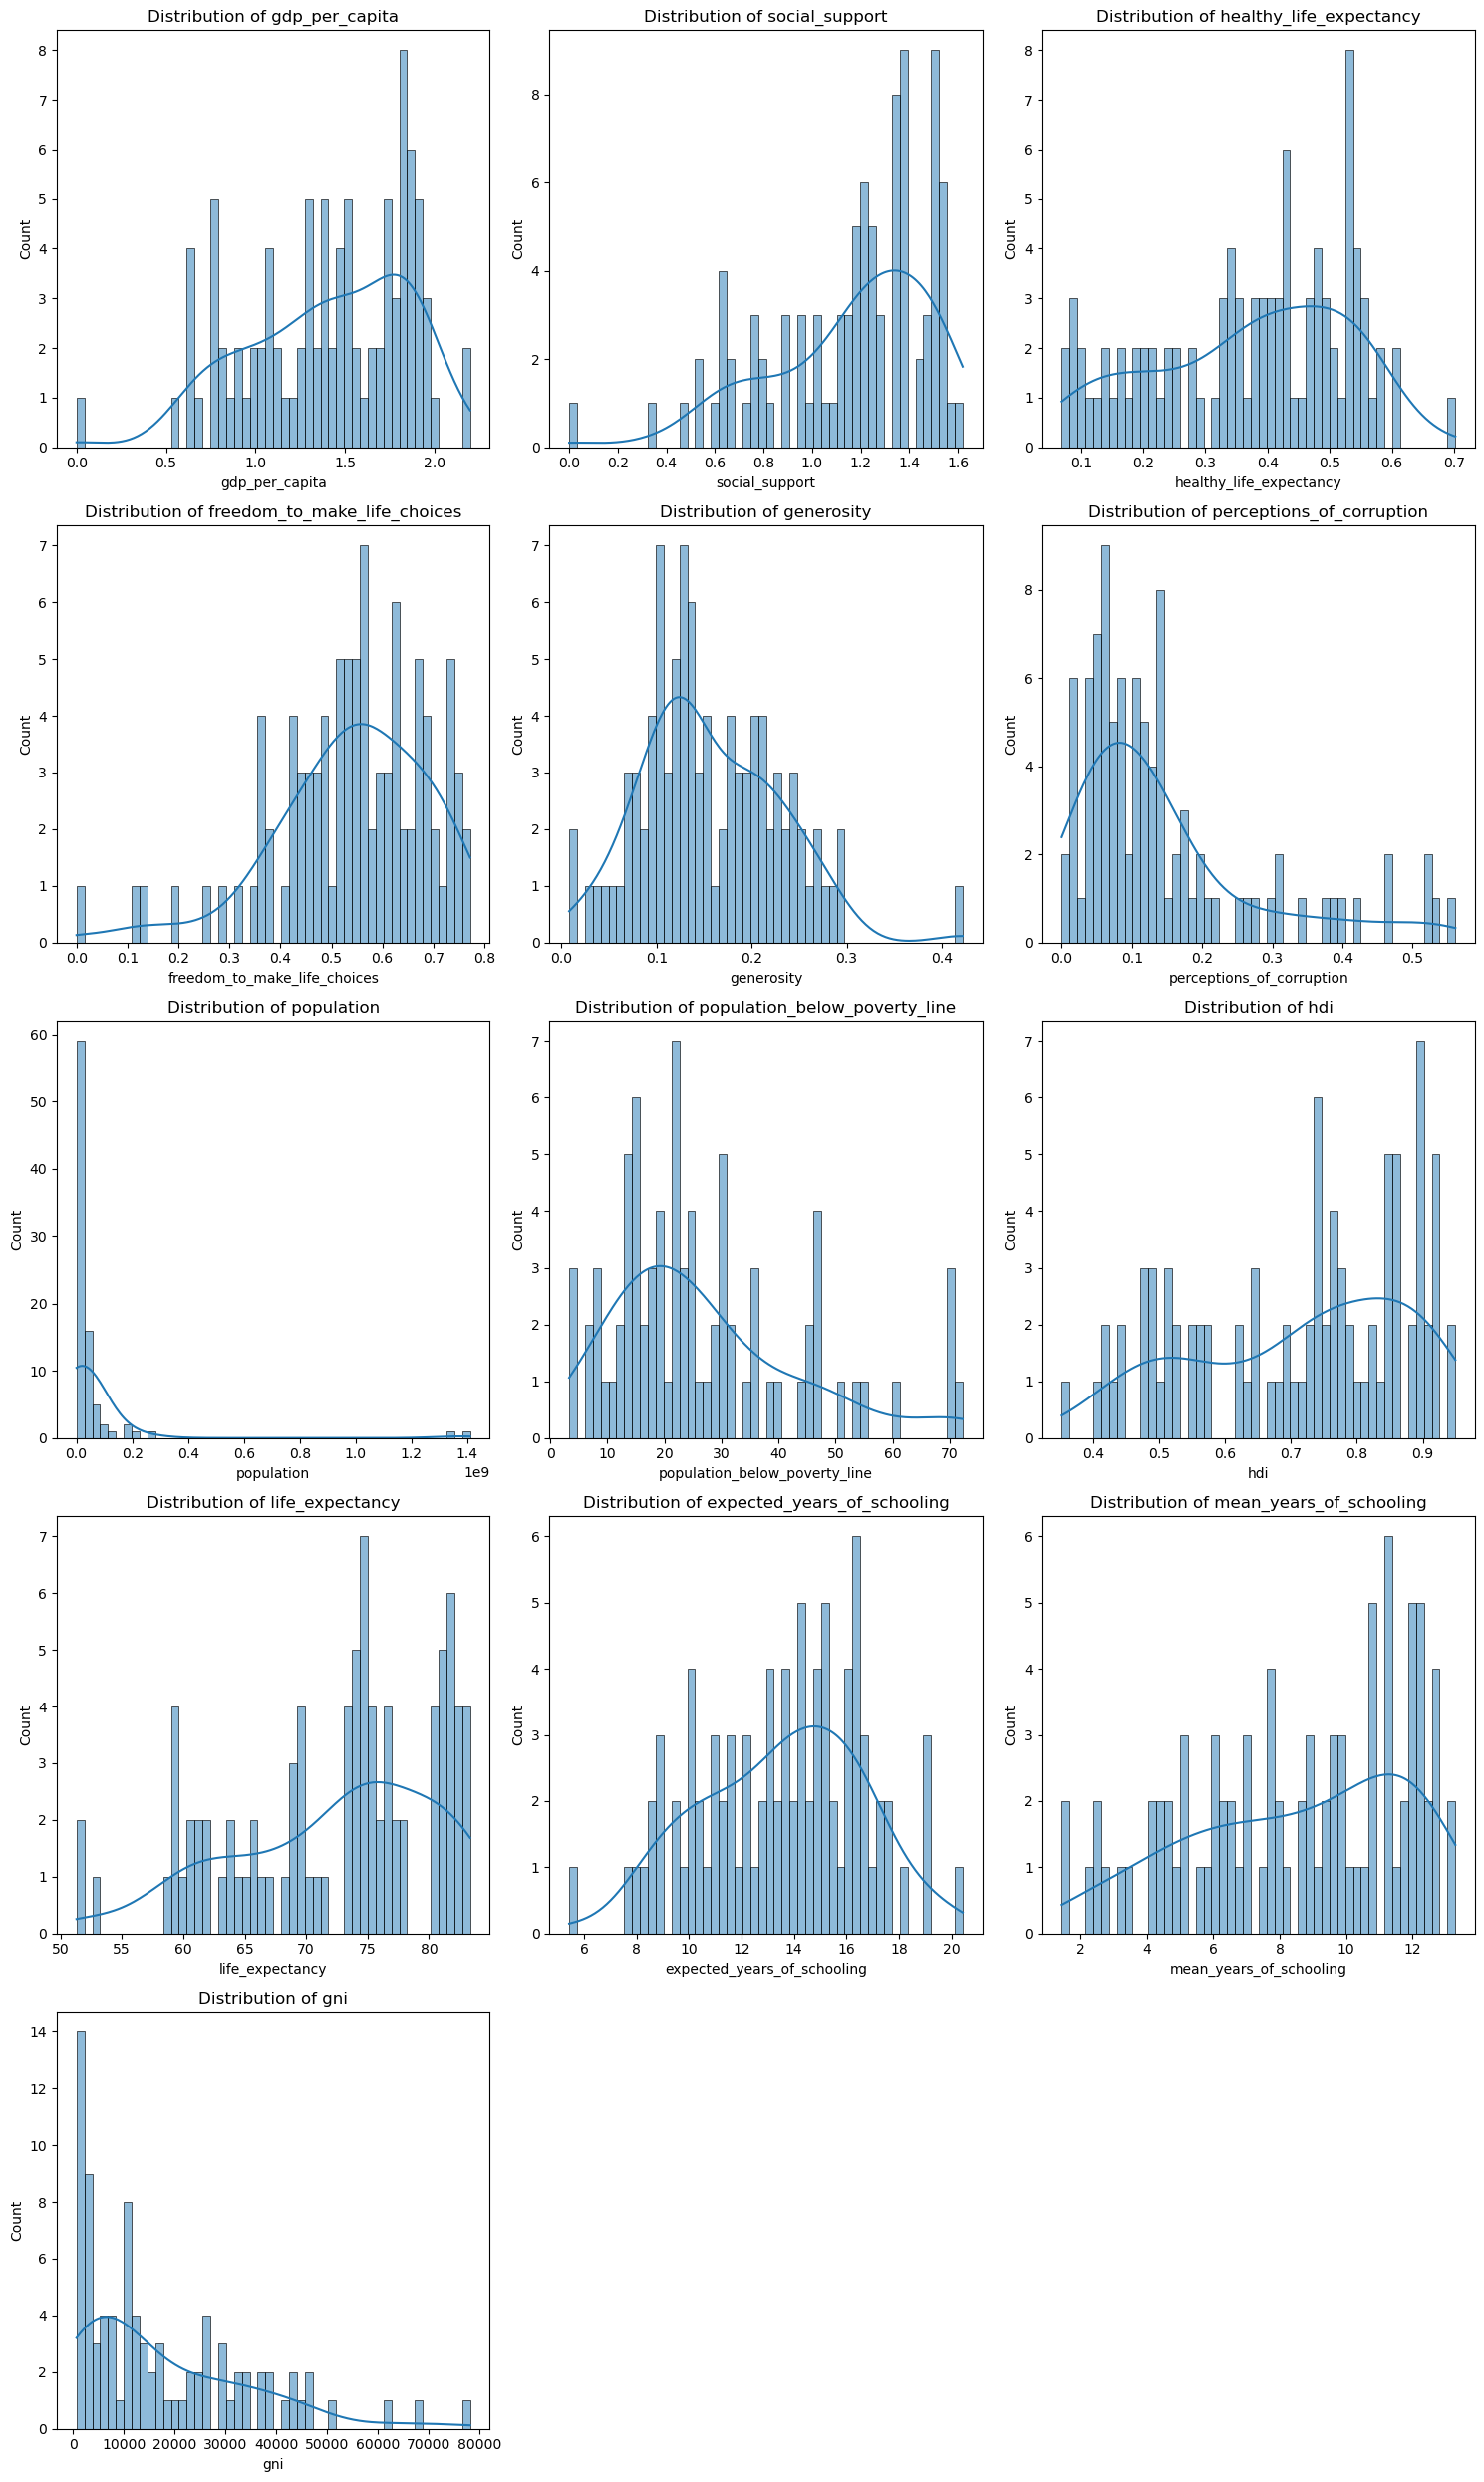

In [280]:
## Your code here:

# Check the distribution of each feathure:
import seaborn as sns
import matplotlib.pyplot as plt

rows, cols = 5, 3
plt.figure(figsize=(15, rows * 5))

for i, feature in enumerate(all_features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(X_train[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [281]:
# Transform into log based on the distribution
import numpy as np

log_features = ["gdp_per_capita", "social_support", "perceptions_of_corruption", "population", "population_below_poverty_line", "gni"]

for feature in log_features:
    X_train[f"log_{feature}"] = np.log1p(X_train[feature])

for feature in log_features:
    X_test[f"log_{feature}"] = np.log1p(X_test[feature])

In [282]:
X_train.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,...,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,log_gdp_per_capita,log_social_support,log_perceptions_of_corruption,log_population,log_population_below_poverty_line,log_gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,...,65.515,10.34614,6.145955,1319.699397,0.489806,0.576051,0.125751,17.056965,4.272491,7.185917
1,Mauritania,Sub-Saharan Africa,1.099,0.764,0.244,0.320,0.130,0.195,4420184.0,31.0,...,63.239,8.46379,4.266000,3527.264154,0.741461,0.567584,0.178146,15.301692,3.465736,8.168561
2,Mongolia,East Asia,1.379,1.494,0.244,0.425,0.239,0.058,3075647.0,21.6,...,69.806,14.84552,9.750000,10449.207270,0.866680,0.913888,0.056380,14.939026,3.117950,9.254377
3,Tajikistan,Commonwealth of Independent States,0.972,1.248,0.291,0.599,0.104,0.292,8921343.0,31.5,...,69.582,11.26186,10.355820,2600.585607,0.679048,0.810041,0.256191,16.003957,3.481240,7.863876
4,Ukraine,Central and Eastern Europe,1.358,1.354,0.355,0.551,0.265,0.016,44222947.0,24.1,...,71.129,15.30672,11.340000,7361.011228,0.857814,0.856116,0.015873,17.604754,3.222868,8.904088


In [283]:
X_test.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,...,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,log_gdp_per_capita,log_social_support,log_perceptions_of_corruption,log_population,log_population_below_poverty_line,log_gni
0,Kazakhstan,Commonwealth of Independent States,1.664,1.491,0.389,0.628,0.136,0.149,18204499.0,2.7,...,69.588,14.971890,11.676000,22093.086510,0.979829,0.912684,0.138892,16.717179,1.308333,10.003065
1,Panama,Latin America and Caribbean,1.714,1.402,0.475,0.630,0.065,0.036,4098587.0,23.0,...,77.755,13.038995,9.854000,19470.202500,0.998424,0.876302,0.035367,15.226153,3.178054,9.876692
2,Bangladesh,South Asia,1.133,0.513,0.355,0.617,0.139,0.165,164669751.0,31.5,...,71.985,10.178706,5.241577,3341.490722,0.757529,0.414094,0.152721,18.919453,3.481240,8.114472
3,Mozambique,Sub-Saharan Africa,0.570,0.885,0.000,0.625,0.161,0.192,29668834.0,46.1,...,55.478,9.068830,3.499116,1098.435768,0.451076,0.633928,0.175633,17.205608,3.852273,7.002552
4,Philippines,Southeast Asia,1.238,1.108,0.286,0.714,0.104,0.141,104918090.0,21.6,...,68.340,11.733020,9.326870,8395.094758,0.805583,0.745740,0.131905,18.468691,3.117950,9.035522


Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [285]:
## Your code here:

X_train['gdp_social_interaction'] = X_train['log_gdp_per_capita'] * X_train['log_social_support']
X_train['health_freedom_interaction'] = X_train['healthy_life_expectancy'] * X_train['freedom_to_make_life_choices']
X_train['corruption_support_interaction'] = X_train['log_perceptions_of_corruption'] * X_train['log_social_support']

X_test['gdp_social_interaction'] = X_test['log_gdp_per_capita'] * X_test['log_social_support']
X_test['health_freedom_interaction'] = X_test['healthy_life_expectancy'] * X_test['freedom_to_make_life_choices']
X_test['corruption_support_interaction'] = X_test['log_perceptions_of_corruption'] * X_test['log_social_support']

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [287]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['int64', 'float64'])
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ## Is this good enough? --> No so I changed (See Explanation In Next Cell)
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['country', 'region']

# Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [289]:
## Your answer :

# Firstly, we identify and extract all the numerical variables in X_train dataset, which are beloinging to int64 and float64 data type.
# This step is becuase we need to create the numeric transformer and categorical tranformer sepretely.

# We then define the transfomation pipeline for numerical features.
# For the inputation, we replace the missing values of each column with the median value of each column.
# For the scaling, we standardizes the numerical features to have a mean of 0 and a variance of 1, which helps prevent features with larger scales from dominating the model.
# The two steps are crucial because they ensure all the numerical features are properly normalized and have no missing values before model training.
# For the SimpleImputer in "numeric_transformer", I change the strategy from constant 0 to 'median' because:
  # We have continuous variables like GDP, which 0 would be a meaningful value that could potentially distort the analysis and make the data artificially skewed.

# We repeat the similar process for the categorical variables. First select and define the categorical features, which are "country" and "region".
# We then create the transfomation pipeline for categorical features.
# The inputation strategy change to "most frequent", ensuring all missing values are replaced with the most common category in each feature.
# The OneHotEncoder will transform categorical variables into binary vectors, allowing machine learning models to interpret them numerically.
# The two steps are because we need to preprocess the categorical data to ensure our machine learning algorithms can understand.

# Finally, we combined the numeric transformer and the categorical transformer to construct the final combined pipeline and named as preprocessor.
# We finally use the trained data to fit the preprocessor, which enables it to learn the necessary statistics,
  # and thus eventually utilize and transform both training and test data consistently.

In [290]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [292]:
## Your Answer :

# The "preprocessor" object is a ColumnTransformer object that combines both numeric and categorical preprocessing pipelines.
  # It's unfitted and served as the foudation for all future transformations and actual data.

# The "preprocess" object is the fitted "preprocessor" object. This object has already learned from X_train about specific parameters.
 # It can now be apply to "X_train" and "X_test".

# The "preprocessor" function is the custom Python function we defined to drop any unnecessary columns, apply preprocessing pipeline, and return the final transformed data.

# The "preprocessed_data" is the final transformed data after all the preprocessing process.
  # It will be a NumPy with all the processed features and ready for us to train model.

In [293]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 127)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [295]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df1 = pd.read_csv('WHR_2023.csv')
df2 = pd.read_csv("newcountryvars.csv")

# We want to rename 'country_name' in df2 to match 'country' in df1
df2.rename(columns={'country_name': 'country'}, inplace=True)

# We want to merge datasets on 'country'
df = df1.merge(df2, on='country', how='inner')

# We want to check if 'region' exists, else remove it
if 'region' not in df.columns:
    categorical_features = ['country']
else:
    categorical_features = ['country', 'region']

df = df.dropna(subset=['happiness_score'])
df['happiness_category'] = pd.qcut(df['happiness_score'], q=3, labels=[0, 1, 2])
y = df['happiness_category']

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('happiness_score')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Prepare training and testing data
X = df[numeric_features + categorical_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

model = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.7692307692307693


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [297]:
## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predicted values (Model 1)
prediction_labels = model.predict(X_test_preprocessed)  # Ensure X_test is preprocessed before prediction

accuracy = accuracy_score(y_test, prediction_labels)
class_report = classification_report(y_test, prediction_labels)
conf_matrix = confusion_matrix(y_test, prediction_labels)

print("Model 1 Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

# Class 0: Low happiness; Class 1: Medium happiness; Class 2: High happiness.
# We can find that class 0 has a very strong performance.
# From the confusion matrix, we can also get that all 8 Class 0 samples were correctly classified, which also indicates perfect recall.
# 2 class 1 samples are misclassified as Class 0, and 6 class 1 samples are correctly classified.
# 4 class 2 samples are misclassified as Class 1, and 6 class 2 samples are correctly classified.


Model 1 Accuracy: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.60      0.75      0.67         8
           2       1.00      0.60      0.75        10

    accuracy                           0.77        26
   macro avg       0.80      0.78      0.77        26
weighted avg       0.82      0.77      0.77        26


Confusion Matrix:
 [[8 0 0]
 [2 6 0]
 [0 4 6]]


## 6. Repeat the process with different parameters to improve the accuracy


In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# We want to keep all transformed features
X_train_final = X_train_preprocessed
X_test_final = X_test_preprocessed

model_2 = RandomForestClassifier(
    n_estimators=400,
    max_depth=14,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.8,
    class_weight='balanced_subsample',
    random_state=42
)

model_2.fit(X_train_final, y_train)
y_pred_2 = model_2.predict(X_test_final)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print(f"Final Improved Model Accuracy: {accuracy_2:.4f}")


Final Improved Model Accuracy: 0.8077


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [301]:
## Your answer :First, the number of trees (n_estimators) was increased from 50 to 400, which made the model more stable by reducing variance and ensuring more consistent predictions.
# Also, max_depth was adjusted from 10 to 14, which allowes trees to capture more complex relationships without overfitting.
# Class_weight was changed from balanced to balanced_subsample, which can ensure that underrepresented happiness categories were given equal importance in every tree.
# The feature selection strategy was also modified by setting max_features=0.8, which can reduce overfitting.
# We also increase min_samples_split from 2 to 5 to prevent excessive splitting and set min_samples_leaf=2 to ensure each leaf node contained at least two samples.
# The combination of increased stability, better feature utilization, and reduced overfitting allowed the model to capture patterns in the data more effectively.
# The changes ensured that the model generalized well to unseen data, which can lead to a significant performance gain.

In [302]:
#Evaluate Model 2:
#-- Generate predicted y values (Model 2)
## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can use full preprocessed test data first
X_test_final = X_test_preprocessed

prediction_labels = model_2.predict(X_test_final)
accuracy = accuracy_score(y_test, prediction_labels)

print(f"Model 2 Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


Model 2 Accuracy: 0.8077

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.64      0.88      0.74         8
           2       1.00      0.60      0.75        10

    accuracy                           0.81        26
   macro avg       0.84      0.83      0.81        26
weighted avg       0.85      0.81      0.80        26


Confusion Matrix:
[[8 0 0]
 [1 7 0]
 [0 4 6]]


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [304]:
## Your answer: We think it is worth making more changes to the parameters. But right now it is inefficient to keep trying random values manually.
# A better alternative is using hyperparameter tuning techniques like GridSearchCV or RandomizedSearchCV, which systematically explore different parameter combinations.

In [305]:
# Submit a third model using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': np.arange(100, 401, 100),
    'max_depth': np.arange(10, 21, 5),
    'min_samples_split': np.arange(2, 11, 4),
    'min_samples_leaf': np.arange(1, 5, 2),
    'max_features': ['sqrt', 'log2']
}

gridmodel = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

gridmodel.fit(X_train_preprocessed, y_train)
print("Best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("Best parameters: {}".format(gridmodel.best_params_))


Best mean cross-validation score: 0.815
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [306]:
#Submit Model 3:

#-- Generate predicted values
## Write code to show model performance by comparing prediction_labels with true labels
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

prediction_labels = gridmodel.best_estimator_.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, prediction_labels)

print(f"Model 3 Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


Model 3 Accuracy: 0.7692

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.62      0.62      0.62         8
           2       0.88      0.70      0.78        10

    accuracy                           0.77        26
   macro avg       0.77      0.78      0.76        26
weighted avg       0.77      0.77      0.76        26


Confusion Matrix:
[[8 0 0]
 [2 5 1]
 [0 3 7]]


In [307]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# We choose the GradientBoostingClassifier model
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_preprocessed, y_train)
prediction_labels = model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, prediction_labels)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction_labels))


Model Accuracy: 0.7308

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.56      0.62      0.59         8
           2       0.78      0.70      0.74        10

    accuracy                           0.73        26
   macro avg       0.74      0.73      0.73        26
weighted avg       0.74      0.73      0.73        26


Confusion Matrix:
[[7 1 0]
 [1 5 2]
 [0 3 7]]


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [309]:
## Your answer:The GradientBoostingClassifier we selected was trained with 200 estimators, a learning rate of 0.1, and a maximum tree depth of 5 to balance performance and prevent overfitting.
# The model achieved 73.08% accuracy, performing well for Class 0 (88% precision) but not well with Class 1 (56% precision), which may lead to some misclassifications.
# The learning rate of 0.1 allowed gradual learning, while max_depth=5 ensured trees were deep enough to capture patterns without overfitting.
# We think this accuracy is not as strong as expected from boosting modele, which may due to insufficient samples in certain classes.
# However, Class 1 misclassifications may indicate some overlaps, which can be improved by feature selection to remove less useful features.
# For further improvements, we can try to increase n_estimators, and adjust learning_rate for preventing overfitting.

## 7. Basic Deep Learning

In [311]:
# Import necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# feature count after preprocessing
feature_count = preprocessor.transform(X_train).shape[1] 

# y_train is one-hot encoded
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)

# Step 3: Define Neural Network Model with 5 layers
keras_model = Sequential([
    Dense(128, activation='relu', input_shape=(feature_count,)),  
    Dense(64, activation='relu'), 
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(num_classes, activation='softmax')
])

# Step 4: Compile the model
keras_model.compile(loss='categorical_crossentropy', 
                    optimizer='sgd', 
                    metrics=['accuracy']) 

# Step 5: Fit the Neural Network to the Training Set
keras_model.fit(preprocessor.transform(X_train), y_train,  
                batch_size=20,  
                epochs=300,  
                validation_split=0.25) 

Epoch 1/300
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.4625 - loss: 1.0672

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4625 - loss: 1.0683 - val_accuracy: 0.3846 - val_loss: 1.0597
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5045 - loss: 1.0576 - val_accuracy: 0.3846 - val_loss: 1.0512
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4297 - loss: 1.0538 - val_accuracy: 0.4615 - val_loss: 1.0430
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4622 - loss: 1.0482 - val_accuracy: 0.5000 - val_loss: 1.0348
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5357 - loss: 1.0313 - val_accuracy: 0.5000 - val_loss: 1.0263
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5832 - loss: 1.0185 - val_accuracy: 0.5385 - val_loss: 1.0174
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6543 - loss: 1.0036 - val_accuracy: 0.5769 - val_loss: 1.0082
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7182 - loss: 1.0019 - val_accuracy: 0.5769 - val_loss: 0.9984
Epoch 9/300

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [313]:
## Your answer:The activation function I used for the middle layers is ReLU, which helps the model learn complex patterns. The reason for using Softmax in the last layer is that the model’s loss function is compiled with ‘categorical_crossentropy,’ and Softmax is the best choice for multi-class classification.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [315]:
## Your answer:Training for 300 epochs led to overfitting, as training accuracy reached 100% while validation accuracy plateaued. More training is unnecessary; early stopping and regularization would improve generalization.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [317]:
## Your answer:categorical_crossentropy is used because the task is multi-class classification. sgd (Stochastic Gradient Descent) is simple but may converge slowly. Switching to adam could improve convergence speed and performance without tuning the learning rate manually.

Can you try getting the model's training history out and plotting the curves?

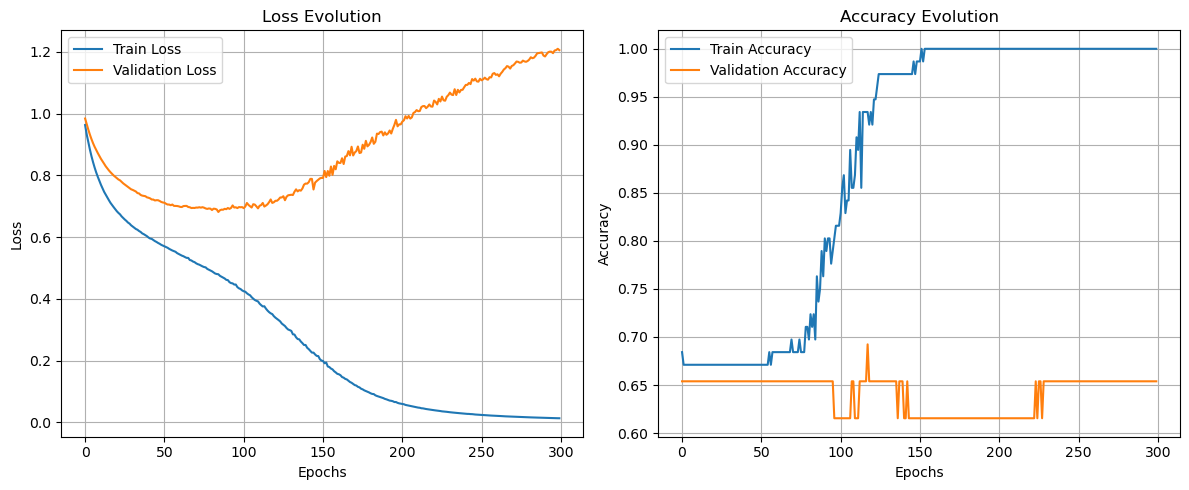

In [319]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [320]:
#-- Generate predicted y values

prediction_column_index = np.argmax(keras_model.predict(preprocessor.transform(X_test)), axis=1)  # Predict

# Extract correct prediction labels
class_labels = list(range(num_classes)) 
prediction_labels = [class_labels[i] for i in prediction_column_index] 

## Write code to show model performance by comparing prediction_labels with true labels
if len(y_test.shape) > 1: 
    true_labels = np.argmax(y_test, axis=1) 
else:
    true_labels = y_test 

# Print model accuracy and classification report
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(true_labels, prediction_labels))
print("\nClassification Report:\n", classification_report(true_labels, prediction_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy: 0.8076923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.67      0.75      0.71         8
           2       1.00      0.70      0.82        10

    accuracy                           0.81        26
   macro avg       0.82      0.82      0.81        26
weighted avg       0.84      0.81      0.81        26



Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [329]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import numpy as np
# Determine feature count after preprocessing
feature_count = preprocessor.transform(X_train).shape[1] 

# Ensure y_train and y_test are one-hot encoded 
y_train = np.array(y_train).flatten() 
y_test = np.array(y_test).flatten() 
num_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

keras_model_regularized = Sequential([
    Dense(128, input_shape=(feature_count,)),  
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

keras_model_regularized.compile(loss='categorical_crossentropy',
                                optimizer='adam',
                                metrics=['accuracy'])

history_regularized = keras_model_regularized.fit(
    preprocessor.transform(X_train), y_train,
    batch_size=20,
    epochs=300,
    validation_split=0.25
)

Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5954 - loss: 0.7188 - val_accuracy: 0.4615 - val_loss: 0.7007
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5172 - loss: 0.8430 - val_accuracy: 0.5385 - val_loss: 0.6930
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4586 - loss: 1.0392 - val_accuracy: 0.5769 - val_loss: 0.6879
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5752 - loss: 0.7806 - val_accuracy: 0.6538 - val_loss: 0.6836
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5230 - loss: 0.8642 - val_accuracy: 0.6154 - val_loss: 0.6804
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5394 - loss: 0.6970 - val_accuracy: 0.6538 - val_loss: 0.6750
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6801 - loss: 0.6880 - val_accuracy: 0.6538 - val_loss: 0.6696
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6363 - loss: 0.6165 - val_accuracy: 0.6538 - val_loss: 0.6645
Epoch 9/300

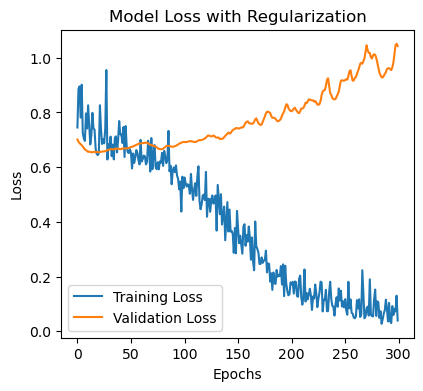

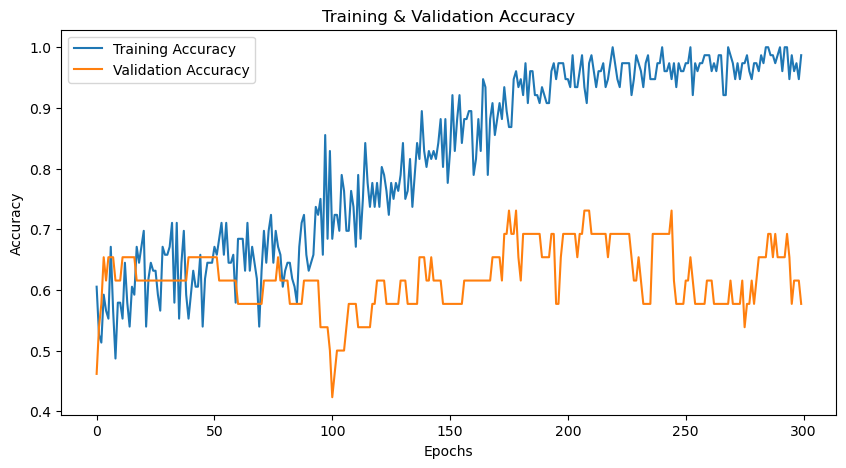

In [331]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_regularized.history['loss'], label='Training Loss')
plt.plot(history_regularized.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.figure(figsize=(10,5))
plt.plot(history_regularized.history['accuracy'], label='Training Accuracy')
plt.plot(history_regularized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

In [324]:
# The use of Dropout and Batch Normalization has reduced overfitting, as seen from the closer gap between training and validation accuracy. Though validation accuracy shows fluctuations, regularization has generally stabilized performance and improved model generalization despite slightly reduced peak accuracy on validation data.

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [337]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation

# LeakyReLU Activation Function Model
leaky_relu_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

leaky_relu_model.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

history_leaky = leaky_relu_model.fit(preprocessor.transform(X_train), y_train,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25)


Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6016 - loss: 0.9470 - val_accuracy: 0.6154 - val_loss: 0.6681
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5261 - loss: 0.8530 - val_accuracy: 0.6538 - val_loss: 0.6740
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5508 - loss: 0.8916 - val_accuracy: 0.5769 - val_loss: 0.6765
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5219 - loss: 0.8149 - val_accuracy: 0.5000 - val_loss: 0.6767
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5396 - loss: 0.9502 - val_accuracy: 0.6154 - val_loss: 0.6764
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5144 - loss: 0.8627 - val_accuracy: 0.6154 - val_loss: 0.6751
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6498 - loss: 0.6875 - val_accuracy: 0.6154 - val_loss: 0.6760
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5732 - loss: 0.8612 - val_accuracy: 0.5769 - val_loss: 0.6760
Epoch 9/300

In [339]:
# Tanh Activation Function Model
tanh_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    Activation('tanh'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

# Compile Tanh model
tanh_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# Fit the Tanh model
tanh_history = tanh_model.fit(preprocessor.transform(X_train), y_train,
                              batch_size=20,
                              epochs=300,
                              validation_split=0.25)


Epoch 1/300


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5439 - loss: 0.8327 - val_accuracy: 0.3846 - val_loss: 0.7429
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5142 - loss: 0.9388 - val_accuracy: 0.4231 - val_loss: 0.7373
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5344 - loss: 0.8502 - val_accuracy: 0.4231 - val_loss: 0.7369
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4900 - loss: 0.9713 - val_accuracy: 0.4231 - val_loss: 0.7344
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5286 - loss: 0.7469 - val_accuracy: 0.4615 - val_loss: 0.7287
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5211 - loss: 0.8122 - val_accuracy: 0.4615 - val_loss: 0.7249
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5100 - loss: 0.8199 - val_accuracy: 0.4615 - val_loss: 0.7179
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4914 - loss: 0.7724 - val_accuracy: 0.5000 - val_loss: 0.7133
Epoch 9/300

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [377]:
print("X_test_dense shape:", X_test_dense.shape)
print("shap_values type:", type(shap_values))

#Examine the format
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}] shape:", sv.shape)
else:
    print("shap_values shape:", shap_values.shape)

X_test_dense shape: (26, 125)
shap_values type: <class 'numpy.ndarray'>
shap_values shape: (26, 125, 2)


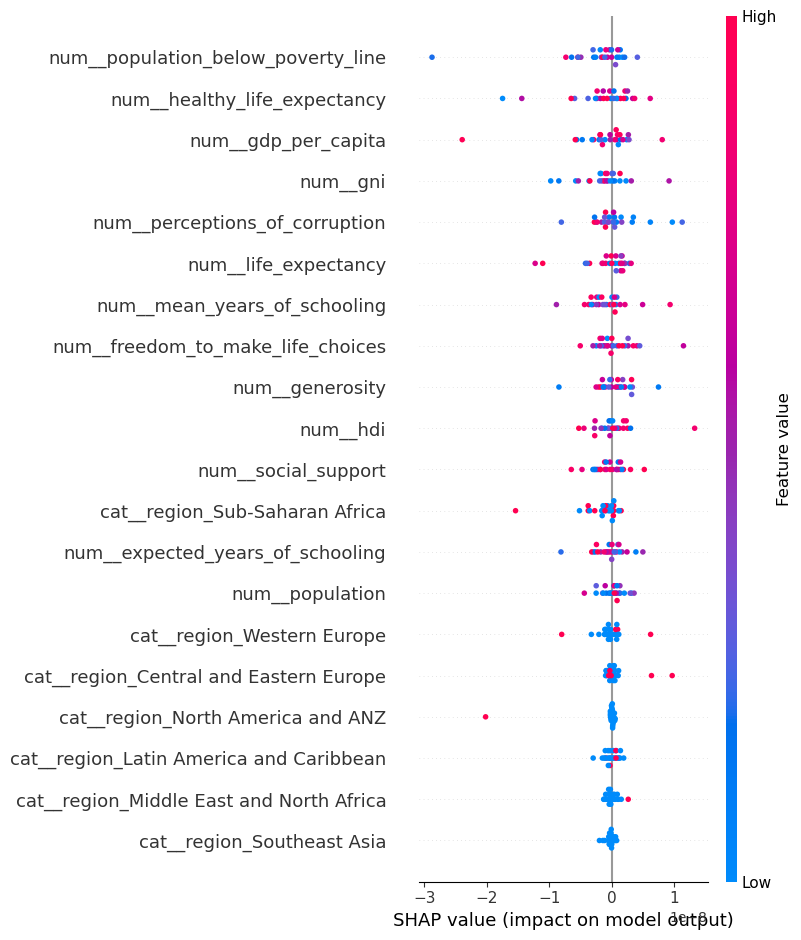

In [389]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(keras_model_regularized, X_train_dense) 

# Compute SHAP values
shap_values = explainer(X_test_dense) 

if len(shap_values.shape) == 3:
    shap_values_to_plot = shap_values.mean(axis=2) Take the mean across classes
else:
    shap_values_to_plot = shap_values

# Generate SHAP summary plot
shap.summary_plot(shap_values_to_plot, X_test_dense, feature_names=preprocessor.get_feature_names_out())

<h3> Experimentation

In [ ]:
##Adding a different dataset, such as economic indicators, might improve the model if the new features provide meaningful signals related to the target variable. However, if the new data does not significantly impact predictions, it could be due to weak correlations between the additional variables and the target, or potential data quality issues like missing values and inconsistencies.

##Through experimentation, I noticed that while some additional features improved accuracy slightly, others introduced noise, leading to overfitting. This highlights the importance of feature selection and understanding variable relationships before merging datasets.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [395]:
## SHAP helps break down my model’s predictions by showing which features influence the outcome the most. It’s useful because it assigns importance scores to each feature, making the model a bit less of a “black box.”

##That said, while the visualizations are great, fully explaining every prediction can still be tricky, especially when multiple features interact in complex ways. It gives a solid overview, but justifying specific predictions to someone unfamiliar with SHAP might still take some effort.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked